<img src="TP3_consigna.png" width="800px">

In [134]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
#%matplotlib qt
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

<h4>1. Obtener una detección de logo en cada imagen sin falsos positivos.</h4>

<function matplotlib.pyplot.show(close=None, block=None)>

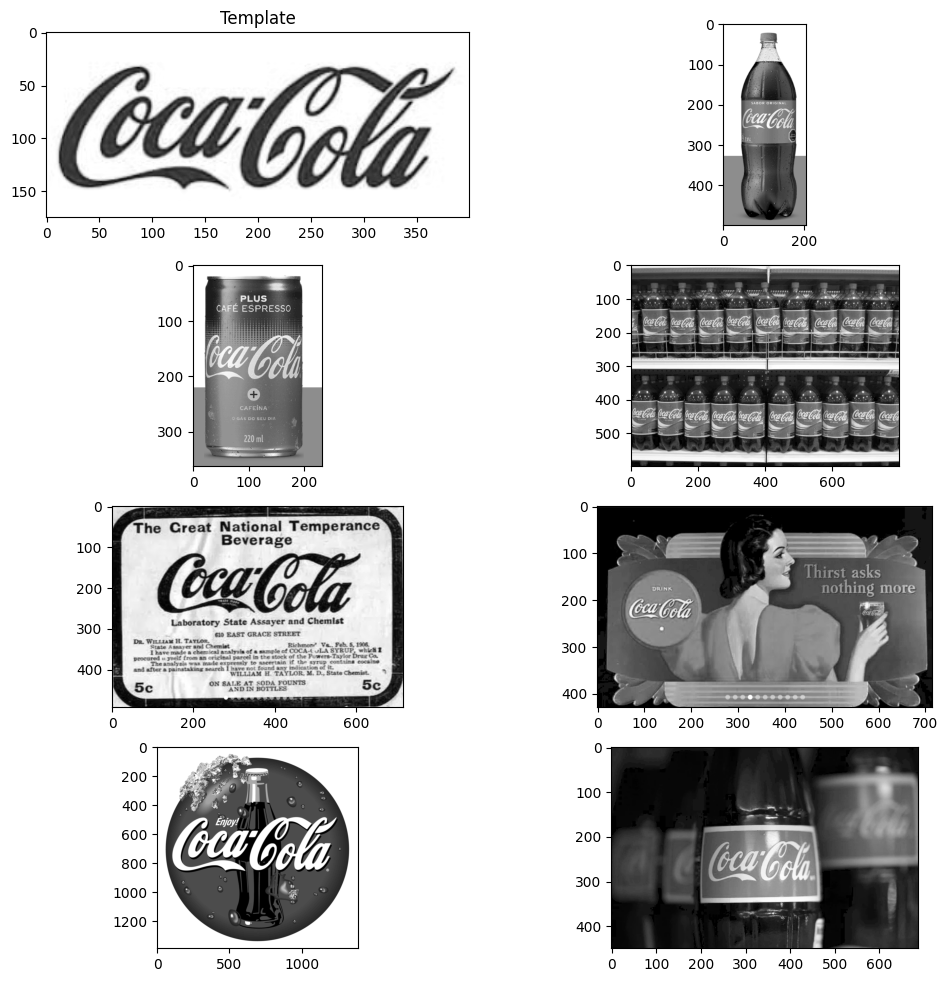

In [135]:
template = cv.imread('template/pattern.png',cv.IMREAD_GRAYSCALE)

images =[]
images.append(cv.imread('images/coca_logo_1.png',cv.IMREAD_GRAYSCALE))
images.append(cv.imread('images/coca_logo_2.png',cv.IMREAD_GRAYSCALE))
images.append(cv.imread('images/coca_multi.png',cv.IMREAD_GRAYSCALE))
images.append(cv.imread('images/coca_retro_1.png',cv.IMREAD_GRAYSCALE))
images.append(cv.imread('images/coca_retro_2.png',cv.IMREAD_GRAYSCALE))
images.append(cv.imread('images/COCA-COLA-LOGO.jpg',cv.IMREAD_GRAYSCALE))
images.append(cv.imread('images/logo_1.png',cv.IMREAD_GRAYSCALE))

plt.figure(figsize=(12,12))
plt.subplot(4,2,1)
plt.title('Template')
plt.imshow(template, cmap='gray')
for i in np.arange(0,7):
    plt.subplot(4,2,i+2)
    plt.imshow(images[i], cmap='gray')
plt.show

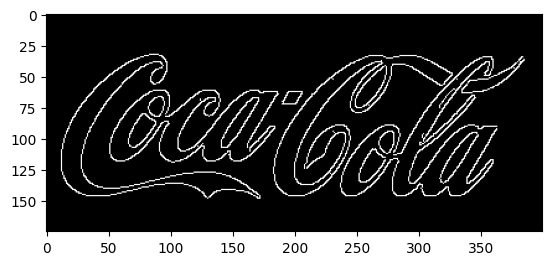

In [136]:
template_edges = cv.Canny(template, threshold1=5, threshold2=200)
plt.figure()
plt.imshow(template_edges,cmap = 'gray')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

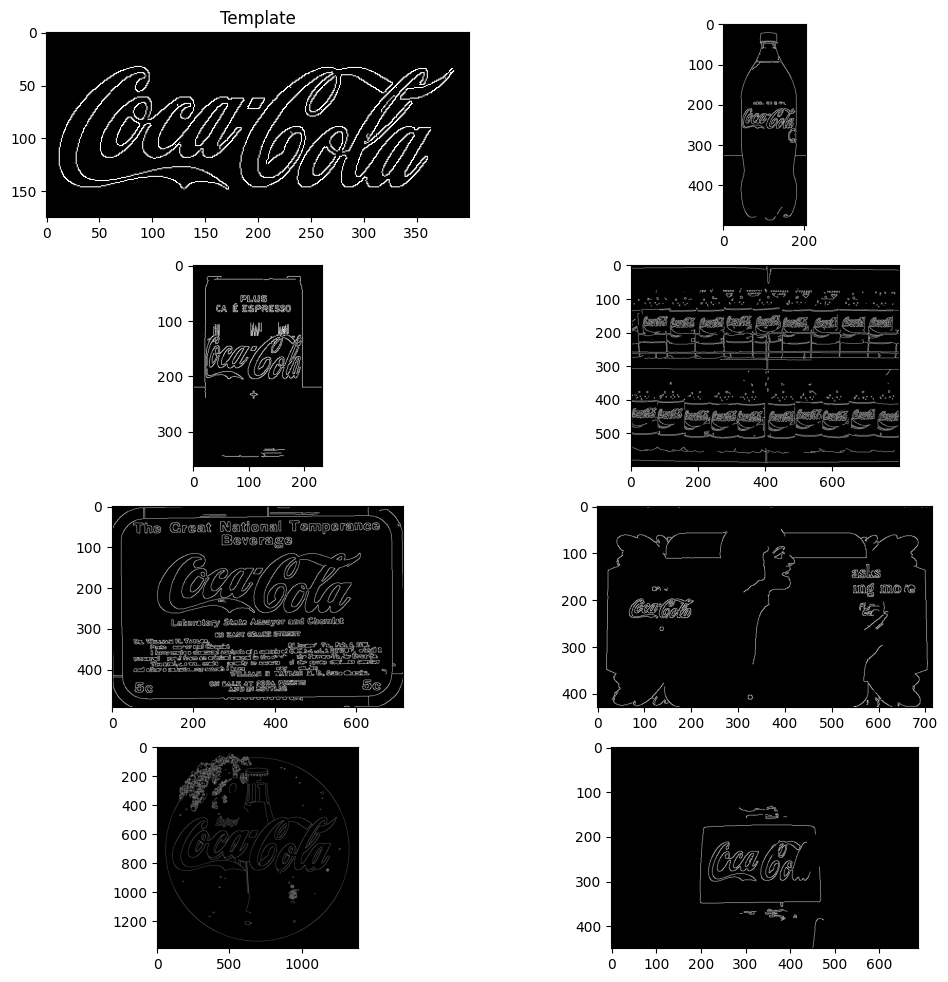

In [137]:
images_edges=[]
for img in images:
    images_edges.append(cv.Canny(img, threshold1=200, threshold2=550))

plt.figure(figsize=(12,12))
plt.subplot(4,2,1)
plt.title('Template')
plt.imshow(template_edges, cmap='gray')
for i in np.arange(0,7):
    plt.subplot(4,2,i+2)
    plt.imshow(images_edges[i], cmap='gray')
plt.show

In [176]:
def buscador_logos(template_edges,img_edges,graficar=True):
    w,h=template_edges.shape[::-1]
    wi, hi = img_edges.shape[::-1]
    scales = np.linspace(0.25, min(wi/w,hi/h), 20)
    resized_template = list()
    # generamos nuestra "piramide" de tamaños arbitrarios
    #print(f'Dimensiones generadas:',0.25, min(wi/w,hi/h))
    for scale in scales:
        resized_template.append(cv.resize(template_edges, None, fx=scale, fy=scale))

    # Hago una copia de la imagen porque le dibujo rectángulos
    img_salida = img_edges.copy()

    max_val_final_1=0
    template_1=None
    top_left1=None
    resultado1=None

    max_val_final_2=0
    template_2=None
    top_left2=None
    resultado2=None

    for templ in resized_template:
        wt, ht = templ.shape[::-1]
        if (wt<wi) and (ht<hi):
            # Aplicamos la coincidencia de patrones
            #--------------------------------------
            res1 = cv.matchTemplate(img_edges, templ, cv.TM_CCOEFF)
            res2 = cv.matchTemplate(img_edges, templ, cv.TM_CCOEFF_NORMED)
            # Encontramos los valores máximos y mínimos
            _, max_val1, _, max_loc1 = cv.minMaxLoc(res1)
            _, max_val2, _, max_loc2 = cv.minMaxLoc(res2)
            if max_val1>max_val_final_1:
                max_val_final_1=max_val1
                template_1=templ
                top_left1=max_loc1
                bottom_right1 = (top_left1[0] + wt, top_left1[1] + ht)
                resultado1=res1

            if max_val2>max_val_final_2:
                max_val_final_2=max_val2
                template_2=templ
                top_left2=max_loc2
                resultado2=res2

    #print(max_val_final_1, max_val_final_2)
    
    # Vemos qué tanto el máximo encontrado ayuda a discriminar. Si es menor a un umbral, usamos el método alternativo.
    media1, desv_std1 = cv.meanStdDev(resultado1)
    max_vs_media_1=(max_val_final_1-media1)/desv_std1[0][0]

    if max_vs_media_1>4:
        resultado=resultado1
        top_left=top_left1
        template=template_1
    else:
        resultado=resultado2
        top_left=top_left2
        template=template_2

    if graficar:
        # Marcamos el lugar donde lo haya encontrado
        #----------------------------------------
        wt, ht = template.shape[::-1]
        bottom_right = (top_left[0] + wt, top_left[1] + ht)
        cv.rectangle(img_salida,top_left, bottom_right, 255, 2)

        # Graficamos el procesamiento y la salida
        #----------------------------------------
        plt.figure()

        # Resultado de coincidencia
        plt.subplot(121),plt.imshow(resultado,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

        # Imagen original con recuadros
        plt.subplot(122),plt.imshow(img_salida,cmap = 'gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

        plt.suptitle(f'Tamaño template={template.shape})')
        plt.show()

    return template

Dimensiones generadas: 0.25 0.5175
22237068.0 0.36944276094436646


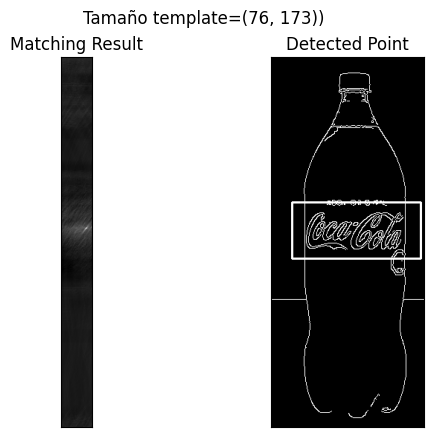

Dimensiones generadas: 0.25 0.5825
9732110.0 0.1321331411600113


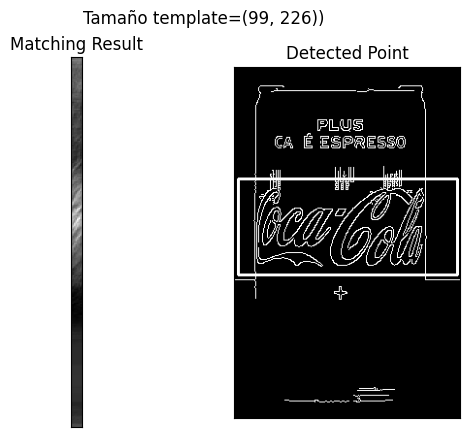

Dimensiones generadas: 0.25 1.9975
44302140.0 0.22962984442710876


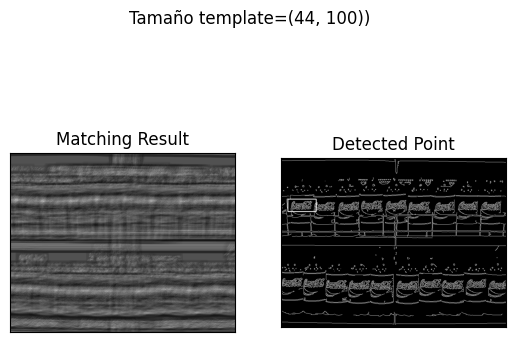

Dimensiones generadas: 0.25 1.7875
36661372.0 0.15077249705791473


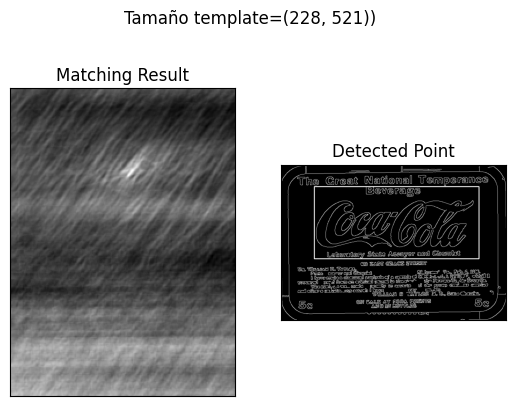

Dimensiones generadas: 0.25 1.7875
16390447.0 0.22714319825172424


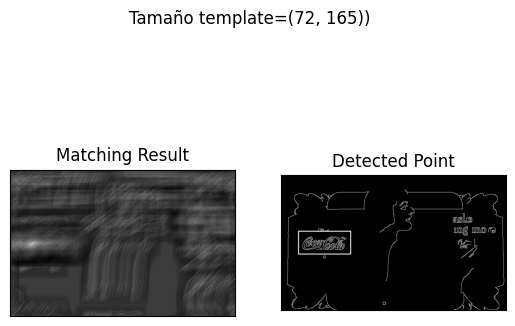

Dimensiones generadas: 0.25 3.4725
117695976.0 0.153482124209404


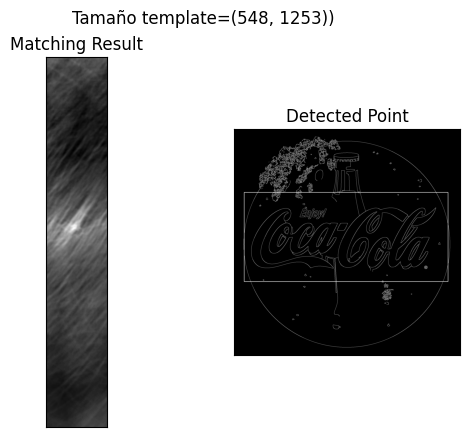

Dimensiones generadas: 0.25 1.7175
17349042.0 0.13178925216197968


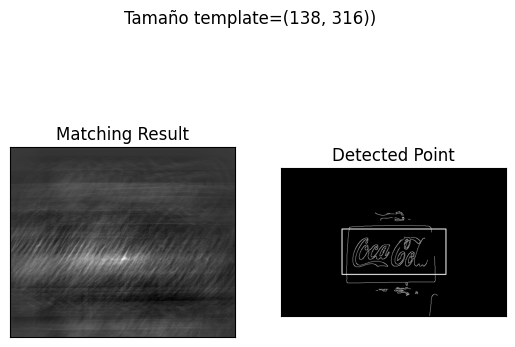

In [153]:
for img in images_edges:
 buscador_logos(template_edges,img)

<h4>2. Detección Múltiple</h>

0.22962984442710876


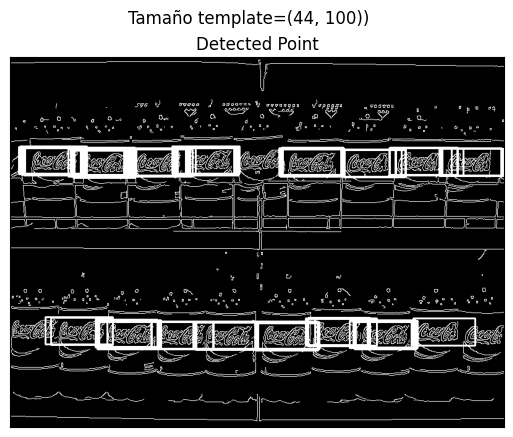

In [177]:
img_multi_edges = images_edges[2]
template = buscador_logos(template_edges,img_multi_edges,False)
img_salida = img_multi_edges.copy()
w, h = template.shape[::-1]
res = cv.matchTemplate(img_multi_edges,template,cv.TM_CCOEFF_NORMED)
_, max_val, _, max_loc = cv.minMaxLoc(res)
print(max_val)
# Fijamos un umbral de "coincidencia"
threshold = 0.13

img_multi_edges
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_salida, pt, (pt[0] + w, pt[1] + h), 255, 2)

plt.figure()
# Imagen original con recuadros
plt.imshow(img_salida,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

plt.suptitle(f'Tamaño template={template.shape})')
plt.show()